# Problem Statement

### Context
1. Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

### The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

## Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [3]:
data.shape

(7043, 21)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Observations:

1. CustomerID is not useful hence drop that column
2. Churn is the target variable in the data

- Churn means discontinuing the service from the telephone organization

<Axes: xlabel='Churn', ylabel='count'>

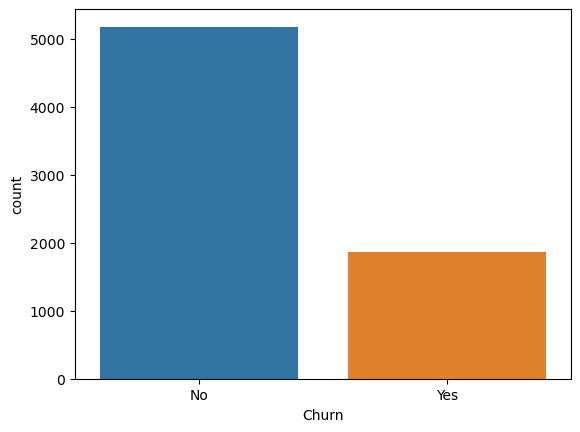

In [5]:
sns.countplot(x = data['Churn'])

In [6]:
data['Churn'].value_counts(normalize = True) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [7]:
data.drop('customerID', axis = 1, inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Observations :

1. No Missing values as from info method. But there is a possibility so recheck all the columns.
2. TotalCharges is wrongly identified as a object so fix it.

In [9]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

## str.zfill to convert row 488 to 0 and then apply to_numeric

- For numerical, " " has to be replaced with null. Null and 0 are not the same
- For text, " " has to be replaced with " "

In [10]:
data['TotalCharges'].str.replace(' ', str(np.nan))

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [12]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<Axes: xlabel='gender', ylabel='count'>

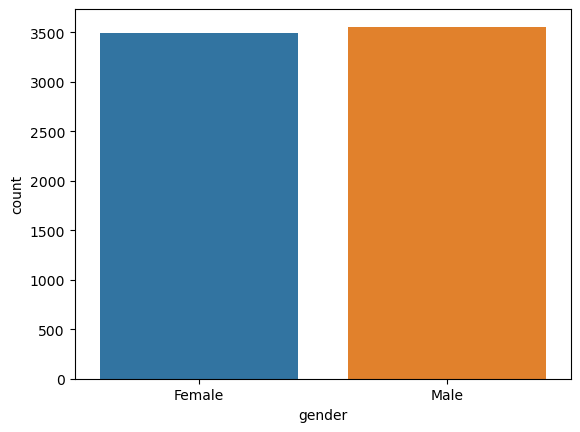

In [13]:
sns.countplot(x = data['gender'])

In [14]:
data['gender'].value_counts(normalize = True) * 100

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

## Observations : 
- Equal number of male and female customers

## Proportion of male to female customers churned

In [15]:
data_churned = data[data['Churn'] == 'Yes']
data_churned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [16]:
data_churned['gender'].value_counts()

Female    939
Male      930
Name: gender, dtype: int64

## Observations:

- Almost equal proportion of Male and Female customers are getting churned

In [17]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Observations:

1. SeniorCitizer should not be a numerical data
2. Possibility of Outliers being present in MonthlyCharges and TotalCharges columns
3. Missing values are present in Total Charges
4. Avg tenure of customers is 32 months
5. Possibility of Monthly and TotalCharges having high correlation

## Outlier Check

<Axes: ylabel='TotalCharges'>

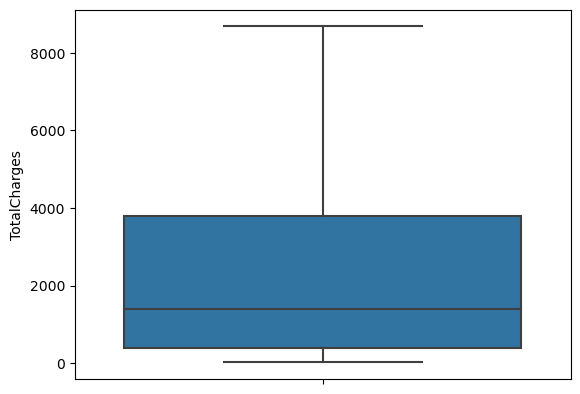

In [18]:
sns.boxplot(y = data['TotalCharges'])

<Axes: ylabel='MonthlyCharges'>

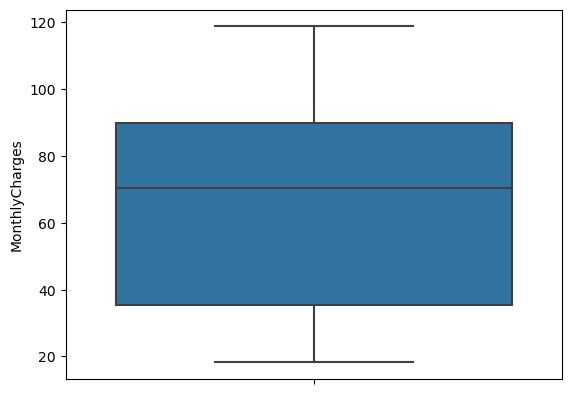

In [19]:
sns.boxplot(y = data['MonthlyCharges'])

In [20]:
data.describe(include = 'O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [21]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

## observations:

- Majority customers are not married and hence no dependents
- InternetService Chosen by majority customers is Fibre optic. 1526 customers are not taking any internet servies
- Customers are not going for OnlineSecurity, OnlineBackup, etc
- Electronic payment is the prefered method of bill payment
- Month - to - month payments is popular

## Check correlation between MonthlyCharges and TotalCharges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

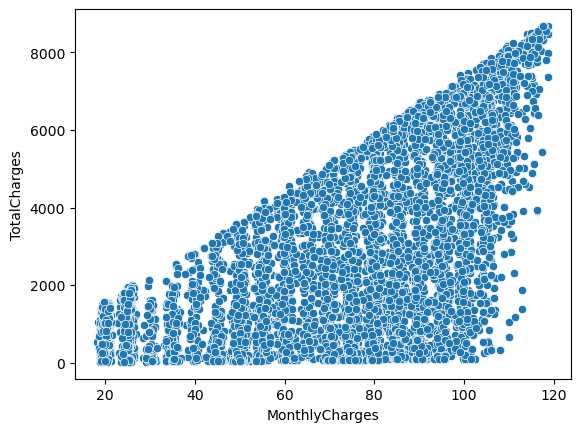

In [22]:
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', data = data)

<Axes: >

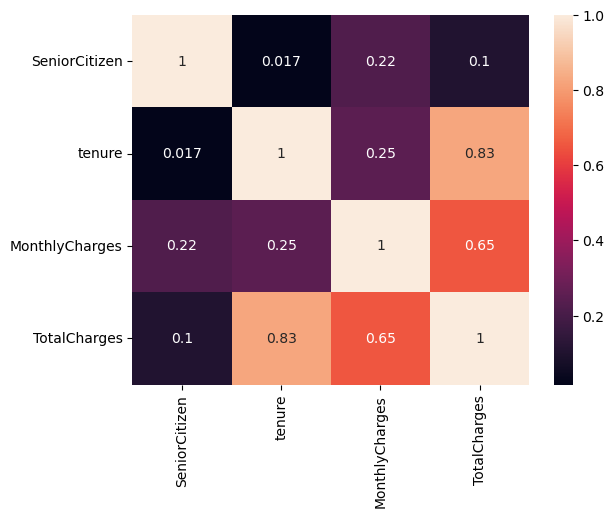

In [23]:
sns.heatmap(data.corr(), annot = True)

In [24]:
data.drop('TotalCharges', axis = 1, inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


## Observations:

1. MonthlyCharges and TotalCharges are highly correlated so dropping the MonthlyCharges column from the data
2. Also, Total Charges is highly correlated with tenure.

- Conclusion : Dropping TotalCharges column is not beneficial because TotalCharges is highly correlated with MonthlyCharges and tenure whereas Dropping MonthlyCharges sounds as a good approach because Monthlycharges column is only correlated with TotalCharges and no correlation with tenure

- Q. Should we consider tenure as a numerical column or categorical column?
#### You can also change the tenure column to object column because it has only discrete numbers. eg: 15 months, 20 months,


<Axes: >

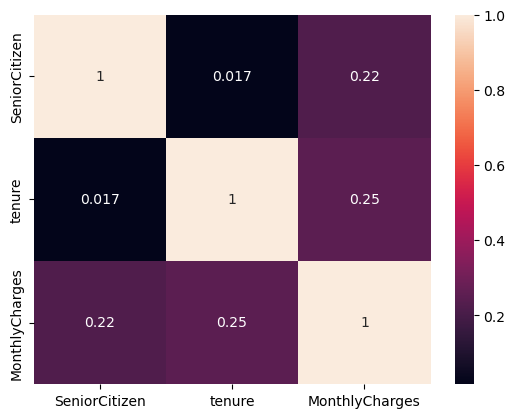

In [25]:
sns.heatmap(data.corr(), annot = True)

#### Change SeniorCitizen column to object

In [26]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<Axes: xlabel='Contract', ylabel='MonthlyCharges'>

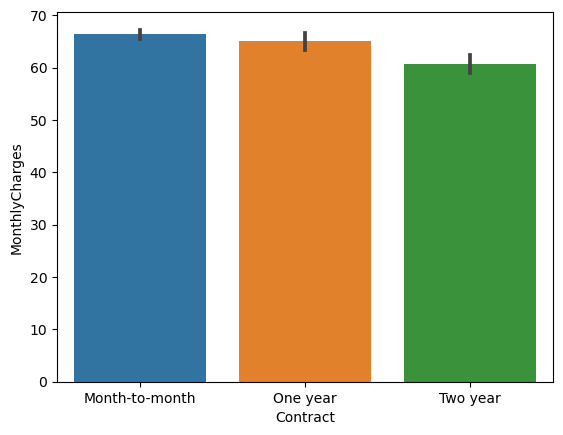

In [27]:
sns.barplot(x = 'Contract', y = 'MonthlyCharges', data = data)

<Axes: xlabel='MonthlyCharges', ylabel='PaymentMethod'>

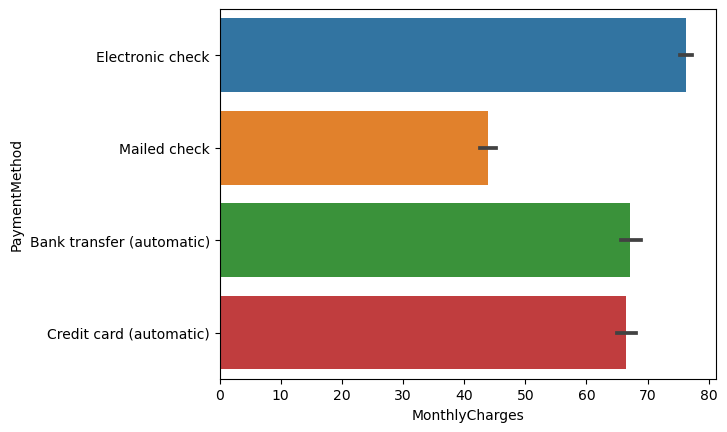

In [28]:
sns.barplot(y = 'PaymentMethod', x = 'MonthlyCharges', data = data)

<Axes: xlabel='PaymentMethod', ylabel='MonthlyCharges'>

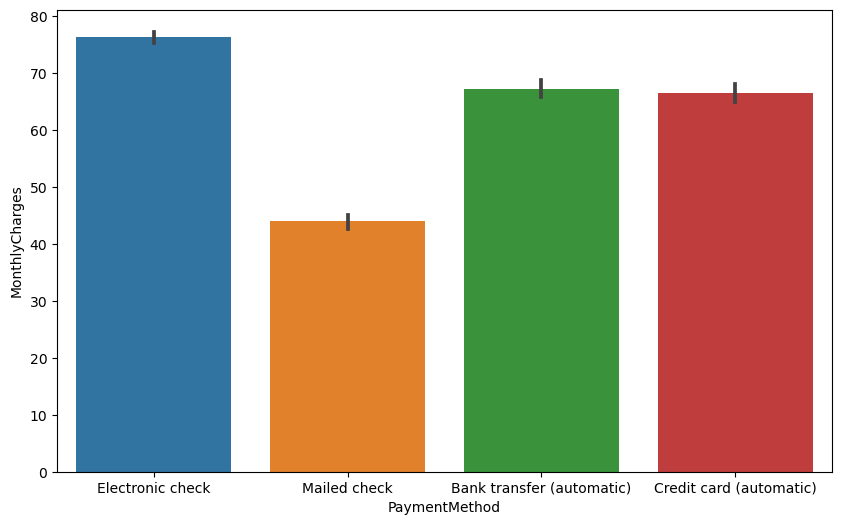

In [29]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'PaymentMethod', y = 'MonthlyCharges', data = data)

## Observations:

1. PaymentMethod common among customers is Electronic method
2. Month - to - Month contract is the most preferred one

## Missing Value Analysis

In [30]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

## Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [32]:
data[['tenure', 'MonthlyCharges']] = ss.fit_transform(data[['tenure', 'MonthlyCharges']])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,-1.277445,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,No
1,Male,0,No,No,0.066327,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.259629,No
2,Male,0,No,No,-1.236724,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,Yes
3,Male,0,No,No,0.514251,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,No
4,Female,0,No,No,-1.236724,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,Yes


## Encoding

In [33]:
dic = {'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2}
data['Contract'] = data['Contract'].replace(dic)

In [34]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,-1.277445,No,No phone service,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,-1.160323,No
1,Male,0,No,No,0.066327,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,-0.259629,No
2,Male,0,No,No,-1.236724,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,-0.362660,Yes
3,Male,0,No,No,0.514251,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer (automatic),-0.746535,No
4,Female,0,No,No,-1.236724,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,0.197365,Yes


## Seperate X and y

In [35]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [36]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,tenure,Contract,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,0,-1.160323,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.066327,1,-0.259629,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.236724,0,-0.362660,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.514251,1,-0.746535,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,-1.236724,0,0.197365,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:
y = pd.get_dummies(y, drop_first = True)
y.head()

,Yes
0,0
1,0
2,1
3,0
4,1


## Split the data into train test split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Fit the Classification Model on the X_train and y_train data

In [40]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [41]:
log_reg.fit(X_train, y_train)

LogisticRegression()

## Perform predictions

In [43]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

## Model Evaluation 

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8143100511073254

## To figure out which Machine Learning Classification model fits best on the data we use pipelines

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

## DecisionTreeClassifier

In [55]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred_dtc = dtc.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred_dtc)

0.7228847245883021

## K nearest Neighbors

In [58]:
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred_knc = knc.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred_knc)

0.7717206132879046

## BernoulliNB

In [61]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [62]:
y_pred_bnb = bnb.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred_bnb)

0.7365133446905168

## Random forest Classifier

In [64]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred_rfc = rfc.predict(X_test)

In [66]:
accuracy_score(y_test, y_pred_rfc)

0.7864849517319704

## Obserevations :

1. Logistic Regression with 81.5% accuracy best fits this data
2. Other Classification algorithms are not as good when compared with LogisticRegression

##  Once you figured out which ML algo best fits the data, apply kFold Cross Validation to get which train and test gives the high accuracy
Logistic Regression best fits this data

In [69]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X, y, cv = 10)

array([0.79148936, 0.8141844 , 0.80283688, 0.81960227, 0.77840909,
       0.79119318, 0.80823864, 0.80823864, 0.79545455, 0.80397727])

## Observations: 

1. For the 4th set of train and test data, the logistic Regression is producing the highest accuracy
2. Remaining 9 set of train and test data, the model is producing comparitively a lesser accuracy

### Check the accuracy on train and test set to verify Overfitting or Underfitting issues

In [71]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [72]:
log_reg.score(X_train, y_train)

0.8014009844755774

In [73]:
log_reg.score(X_test, y_test)

0.8143100511073254

### Observations: 

1. Accuracies are almost equal thereby indicating that there are no overfitting and underfitting issues

## Outline of any project

1. Problem Statement definition
2. Loading and Understanding the data(shape, dtypes, unqiue, etc)
3. Exploratory Data Analysis and Feature Engineering
4. Data Preprocessing
5. Model Buidling
6. Check the best ML model fitting the data.
7. Perform Cross validation 
8. Check for Overfitting and Underfitting issues
9. If issues exist then perform Hyperparameter Tuning
10. Create Pipelines and Column Transformers

In [75]:
steps = [
            ('Logistic Regression', log_reg), 
            ('Naive Bayes', bnb),
            ('K-Nearest Neighbors', knc), 
            ('Decision Tree', dtc),
            ('Random Forest', rfc)
            ]
steps

[('Logistic Regression', LogisticRegression()),
 ('Naive Bayes', BernoulliNB()),
 ('K-Nearest Neighbors', KNeighborsClassifier()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('Random Forest', RandomForestClassifier())]

## Think of creating a project on Regression kind of algorithms